In [1]:
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

PATH='dataset/electricity_data_all/*'
#Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')

In [2]:
hour2rrp_2019 = defaultdict(list)
hour2demand_2019 = defaultdict(list)
hour2rrp_2020 = defaultdict(list)
hour2demand_2020 = defaultdict(list)

def get_hour(day_str):
    day = day_str.split()[0]
    hour = day_str.split()[1]
    month = '/'.join(day.split('/')[:2])
    return day, month, hour

for file in glob.glob(PATH):
    df = pd.read_csv(file)
    for idx, row in df.iterrows():        
        day, month, hour = get_hour(row['SETTLEMENTDATE'])        
        if day >= '2019/03/01' and day <= '2019/09/30':
            hour2rrp_2019[hour].append(row['RRP'])
            hour2demand_2019[hour].append(row['TOTALDEMAND'])
        elif day >= '2020/03/01' and day <= '2020/09/30':
            hour2rrp_2020[hour].append(row['RRP'])
            hour2demand_2020[hour].append(row['TOTALDEMAND'])

In [3]:
hour2rrp_2019=dict(sorted(hour2rrp_2019.items()))
hour2demand_2019=dict(sorted(hour2demand_2019.items()))
hour2rrp_2020=dict(sorted(hour2rrp_2020.items()))
hour2demand_2020=dict(sorted(hour2demand_2020.items()))

In [4]:
hours_2019=[]; demand_2019=[]
hours_2020=[]; demand_2020=[]
for hour in hour2demand_2019.keys():
    hours_2019.append(hour)
    demand_2019.append((np.mean(hour2demand_2019[hour]), np.std(hour2demand_2019[hour])))
    hours_2020.append(hour)
    demand_2020.append((np.mean(hour2demand_2020[hour]), np.std(hour2demand_2020[hour])))
    
df = pd.DataFrame()
df['hour']=[':'.join(a.split(':')[:2]) for a in hours_2019]
df['2019']=[a[0] for a in demand_2019]
df['2020']=[a[0] for a in demand_2020]
df['2019_st']=[a[1] for a in demand_2019]
df['2020_st']=[a[1] for a in demand_2020]    

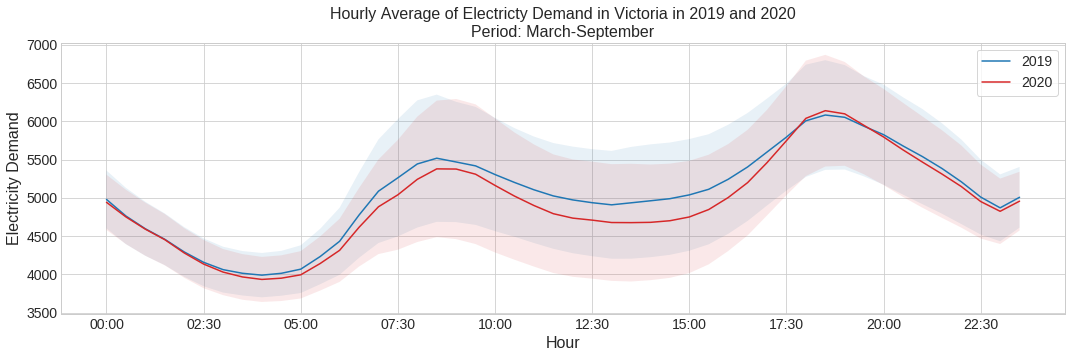

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

title = f'Hourly Average of Electricty Demand in Victoria in 2019 and 2020\nPeriod: March-September'
fig = plt.figure(figsize=(18,5))
ax = plt.axes()

ax.plot(df['hour'], df['2019'], color='tab:blue', label='2019')   
ax.plot(df['hour'], df['2020'], color='tab:red', label='2020')  # Grayscale between 0 and 1

ax.fill_between(df['hour'], df['2019']+df['2019_st'], df['2019']-df['2019_st'], facecolor='tab:blue', alpha=0.1)
ax.fill_between(df['hour'], df['2020']+df['2020_st'], df['2020']-df['2020_st'], facecolor='tab:red', alpha=0.1)

plt.title(title, fontsize=16)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Electricity Demand', fontsize=16)
#plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
#ax.set_ylim(ymin=0)
#ax.set_ylim(ymax=0.4)
plt.legend(frameon=True, fontsize=14)
plt.tick_params(labelsize=14)
fig.savefig("Electricity Demand between 2019 and 2020.pdf", bbox_inches='tight')

In [6]:
hours_2019=[]; demand_2019=[]
hours_2020=[]; demand_2020=[]
for hour in hour2rrp_2020.keys():
    hours_2019.append(hour)
    demand_2019.append((np.mean(hour2rrp_2019[hour]), np.std(hour2rrp_2019[hour])))

    hours_2020.append(hour)
    demand_2020.append((np.mean(hour2rrp_2020[hour]), np.std(hour2rrp_2020[hour])))
df = pd.DataFrame()
df['hour']=[':'.join(a.split(':')[:2]) for a in hours_2019]
df['2019']=[a[0] for a in demand_2019]
df['2020']=[a[0] for a in demand_2020]
df['2019_st']=[a[1] for a in demand_2019]
df['2020_st']=[a[1] for a in demand_2020]    

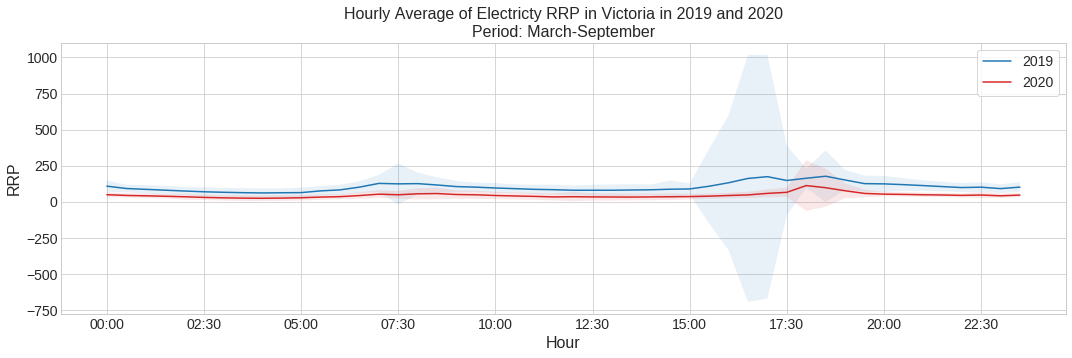

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

title = f'Hourly Average of Electricty RRP in Victoria in 2019 and 2020\nPeriod: March-September'
fig = plt.figure(figsize=(18,5))
ax = plt.axes()

ax.plot(df['hour'], df['2019'], color='tab:blue', label='2019')   
ax.plot(df['hour'], df['2020'], color='tab:red', label='2020')  # Grayscale between 0 and 1

ax.fill_between(df['hour'], df['2019']+df['2019_st'], df['2019']-df['2019_st'], facecolor='tab:blue', alpha=0.1)
ax.fill_between(df['hour'], df['2020']+df['2020_st'], df['2020']-df['2020_st'], facecolor='tab:red', alpha=0.1)

plt.title(title, fontsize=16)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('RRP', fontsize=16)
#plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
#ax.set_ylim(ymin=0)
#ax.set_ylim(ymax=0.4)
plt.legend(frameon=True, fontsize=14)
plt.tick_params(labelsize=14)
fig.savefig("Electricity RRP between 2019 and 2020.pdf", bbox_inches='tight')

In [8]:
#Offday vs Workingday

working_hour2rrp_2019 = defaultdict(list)
working_hour2demand_2019 = defaultdict(list)
working_hour2rrp_2020 = defaultdict(list)
working_hour2demand_2020 = defaultdict(list)

offday_hour2rrp_2019 = defaultdict(list)
offday_hour2demand_2019 = defaultdict(list)
offday_hour2rrp_2020 = defaultdict(list)
offday_hour2demand_2020 = defaultdict(list)

from datetime import datetime

def is_offday(time):
    # month/day
    time = datetime.strptime(time, "%Y/%m/%d %H:%M:%S")
    holidays = ['01/01', '01/27', '03/09', '04/10', '04/25', '06/08', \
     '10/23', '12/25', '12/26', '12/27', '12/28', '12/29', '12/30', '12/31']
    return int(time.strftime("%m/%d") in holidays or time.strftime('%A') in ['Saturday', 'Sunday'])
            
def get_hour(day_str):
    day = day_str.split()[0]
    hour = day_str.split()[1]
    month = '/'.join(day.split('/')[:2])
    return day, month, hour

for file in glob.glob(PATH):
    df = pd.read_csv(file)
    for idx, row in df.iterrows():        
        day, month, hour = get_hour(row['SETTLEMENTDATE'])
        isoffday = is_offday(row['SETTLEMENTDATE'])
               
        if day >= '2019/03/01' and day <= '2019/09/30':
            if isoffday:
                offday_hour2rrp_2019[hour].append(row['RRP'])
                offday_hour2demand_2019[hour].append(row['TOTALDEMAND'])
            else:
                working_hour2rrp_2019[hour].append(row['RRP'])
                working_hour2demand_2019[hour].append(row['TOTALDEMAND'])
        elif day >= '2020/03/01' and day <= '2020/09/30':
            if isoffday:
                offday_hour2rrp_2020[hour].append(row['RRP'])
                offday_hour2demand_2020[hour].append(row['TOTALDEMAND'])
            else:
                working_hour2rrp_2020[hour].append(row['RRP'])
                working_hour2demand_2020[hour].append(row['TOTALDEMAND'])

In [9]:
working_hour2rrp_2019=dict(sorted(working_hour2rrp_2019.items()))
working_hour2demand_2019=dict(sorted(working_hour2demand_2019.items()))
working_hour2rrp_2020=dict(sorted(working_hour2rrp_2020.items()))
working_hour2demand_2020=dict(sorted(working_hour2demand_2020.items()))

offday_hour2rrp_2019=dict(sorted(offday_hour2rrp_2019.items()))
offday_hour2demand_2019=dict(sorted(offday_hour2demand_2019.items()))
offday_hour2rrp_2020=dict(sorted(offday_hour2rrp_2020.items()))
offday_hour2demand_2020=dict(sorted(offday_hour2demand_2020.items()))

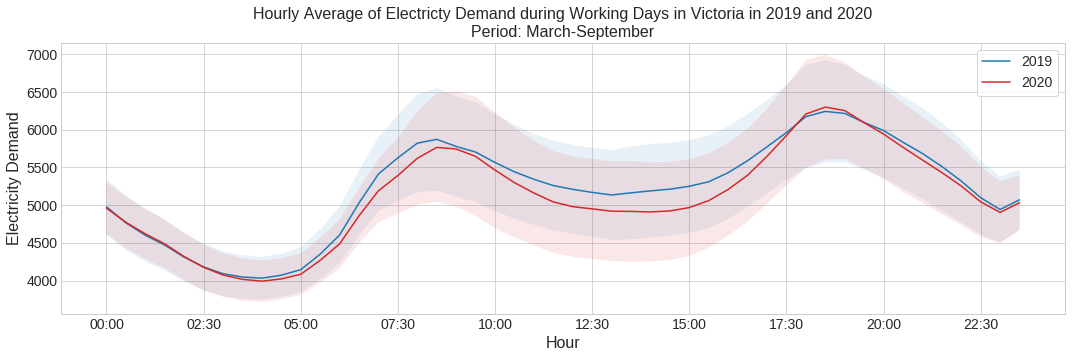

In [10]:
hours_2019=[]; demand_2019=[]
hours_2020=[]; demand_2020=[]
for hour in working_hour2demand_2019.keys():
    hours_2019.append(hour)
    demand_2019.append((np.mean(working_hour2demand_2019[hour]), np.std(working_hour2demand_2019[hour])))
    hours_2020.append(hour)
    demand_2020.append((np.mean(working_hour2demand_2020[hour]), np.std(working_hour2demand_2020[hour])))
    
df = pd.DataFrame()
df['hour']=[':'.join(a.split(':')[:2]) for a in hours_2019]
df['2019']=[a[0] for a in demand_2019]
df['2020']=[a[0] for a in demand_2020]
df['2019_st']=[a[1] for a in demand_2019]
df['2020_st']=[a[1] for a in demand_2020]    

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

title = f'Hourly Average of Electricty Demand during Working Days in Victoria in 2019 and 2020\nPeriod: March-September'
fig = plt.figure(figsize=(18,5))
ax = plt.axes()

ax.plot(df['hour'], df['2019'], color='tab:blue', label='2019')   
ax.plot(df['hour'], df['2020'], color='tab:red', label='2020')  # Grayscale between 0 and 1

ax.fill_between(df['hour'], df['2019']+df['2019_st'], df['2019']-df['2019_st'], facecolor='tab:blue', alpha=0.1)
ax.fill_between(df['hour'], df['2020']+df['2020_st'], df['2020']-df['2020_st'], facecolor='tab:red', alpha=0.1)

plt.title(title, fontsize=16)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Electricity Demand', fontsize=16)
#plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
#ax.set_ylim(ymin=0)
#ax.set_ylim(ymax=0.4)
plt.legend(frameon=True, fontsize=14)
plt.tick_params(labelsize=14)
fig.savefig("Electricity Demand (Working Days) between 2019 and 2020.pdf", bbox_inches='tight')

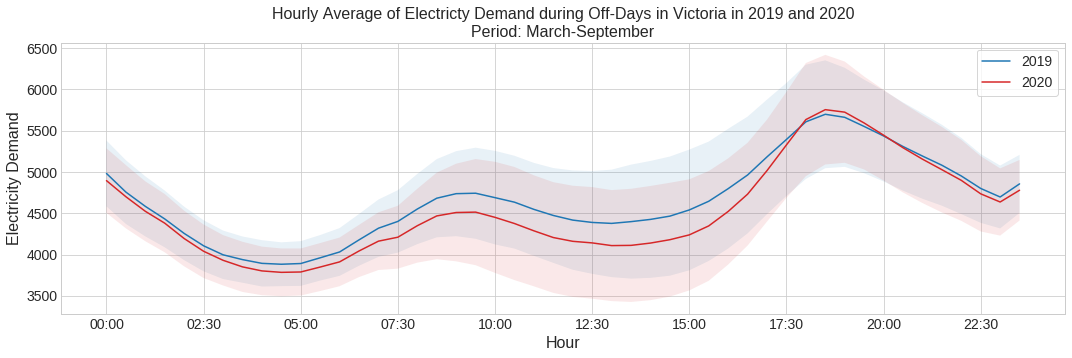

In [11]:
hours_2019=[]; demand_2019=[]
hours_2020=[]; demand_2020=[]
for hour in offday_hour2demand_2019.keys():
    hours_2019.append(hour)
    demand_2019.append((np.mean(offday_hour2demand_2019[hour]), np.std(offday_hour2demand_2019[hour])))
    hours_2020.append(hour)
    demand_2020.append((np.mean(offday_hour2demand_2020[hour]), np.std(offday_hour2demand_2020[hour])))
    
df = pd.DataFrame()
df['hour']=[':'.join(a.split(':')[:2]) for a in hours_2019]
df['2019']=[a[0] for a in demand_2019]
df['2020']=[a[0] for a in demand_2020]
df['2019_st']=[a[1] for a in demand_2019]
df['2020_st']=[a[1] for a in demand_2020]    

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

title = f'Hourly Average of Electricty Demand during Off-Days in Victoria in 2019 and 2020\nPeriod: March-September'
fig = plt.figure(figsize=(18,5))
ax = plt.axes()

ax.plot(df['hour'], df['2019'], color='tab:blue', label='2019')   
ax.plot(df['hour'], df['2020'], color='tab:red', label='2020')  # Grayscale between 0 and 1

ax.fill_between(df['hour'], df['2019']+df['2019_st'], df['2019']-df['2019_st'], facecolor='tab:blue', alpha=0.1)
ax.fill_between(df['hour'], df['2020']+df['2020_st'], df['2020']-df['2020_st'], facecolor='tab:red', alpha=0.1)

plt.title(title, fontsize=16)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Electricity Demand', fontsize=16)
#plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
#ax.set_ylim(ymin=0)
#ax.set_ylim(ymax=0.4)
plt.legend(frameon=True, fontsize=14)
plt.tick_params(labelsize=14)
fig.savefig("Electricity Demand (Off-days) between 2019 and 2020.pdf", bbox_inches='tight')

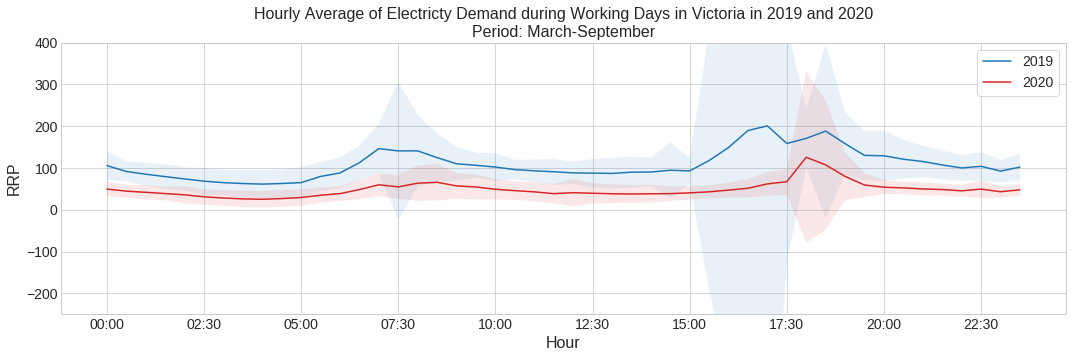

In [12]:
hours_2019=[]; demand_2019=[]
hours_2020=[]; demand_2020=[]
for hour in working_hour2rrp_2019.keys():
    hours_2019.append(hour)
    demand_2019.append((np.mean(working_hour2rrp_2019[hour]), np.std(working_hour2rrp_2019[hour])))
    hours_2020.append(hour)
    demand_2020.append((np.mean(working_hour2rrp_2020[hour]), np.std(working_hour2rrp_2020[hour])))
    
df = pd.DataFrame()
df['hour']=[':'.join(a.split(':')[:2]) for a in hours_2019]
df['2019']=[a[0] for a in demand_2019]
df['2020']=[a[0] for a in demand_2020]
df['2019_st']=[a[1] for a in demand_2019]
df['2020_st']=[a[1] for a in demand_2020]    

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

title = f'Hourly Average of Electricty Demand during Working Days in Victoria in 2019 and 2020\nPeriod: March-September'
fig = plt.figure(figsize=(18,5))
ax = plt.axes()

ax.plot(df['hour'], df['2019'], color='tab:blue', label='2019')   
ax.plot(df['hour'], df['2020'], color='tab:red', label='2020')  # Grayscale between 0 and 1

ax.fill_between(df['hour'], df['2019']+df['2019_st'], df['2019']-df['2019_st'], facecolor='tab:blue', alpha=0.1)
ax.fill_between(df['hour'], df['2020']+df['2020_st'], df['2020']-df['2020_st'], facecolor='tab:red', alpha=0.1)

plt.title(title, fontsize=16)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('RRP', fontsize=16)
#plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.set_ylim(ymin=-250)
ax.set_ylim(ymax=400)
plt.legend(frameon=True, fontsize=14)
plt.tick_params(labelsize=14)
fig.savefig("Electricity RRP (Working Days) between 2019 and 2020.pdf", bbox_inches='tight')

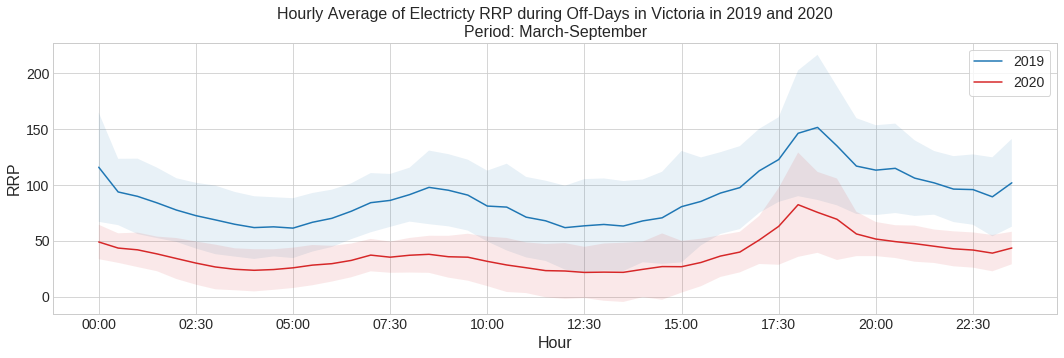

In [13]:
hours_2019=[]; demand_2019=[]
hours_2020=[]; demand_2020=[]
for hour in offday_hour2rrp_2019.keys():
    hours_2019.append(hour)
    demand_2019.append((np.mean(offday_hour2rrp_2019[hour]), np.std(offday_hour2rrp_2019[hour])))
    hours_2020.append(hour)
    demand_2020.append((np.mean(offday_hour2rrp_2020[hour]), np.std(offday_hour2rrp_2020[hour])))
    
df = pd.DataFrame()
df['hour']=[':'.join(a.split(':')[:2]) for a in hours_2019]
df['2019']=[a[0] for a in demand_2019]
df['2020']=[a[0] for a in demand_2020]
df['2019_st']=[a[1] for a in demand_2019]
df['2020_st']=[a[1] for a in demand_2020]    

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

title = f'Hourly Average of Electricty RRP during Off-Days in Victoria in 2019 and 2020\nPeriod: March-September'
fig = plt.figure(figsize=(18,5))
ax = plt.axes()

ax.plot(df['hour'], df['2019'], color='tab:blue', label='2019')   
ax.plot(df['hour'], df['2020'], color='tab:red', label='2020')  # Grayscale between 0 and 1

ax.fill_between(df['hour'], df['2019']+df['2019_st'], df['2019']-df['2019_st'], facecolor='tab:blue', alpha=0.1)
ax.fill_between(df['hour'], df['2020']+df['2020_st'], df['2020']-df['2020_st'], facecolor='tab:red', alpha=0.1)

plt.title(title, fontsize=16)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('RRP', fontsize=16)
#plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
#ax.set_ylim(ymin=0)
#ax.set_ylim(ymax=0.4)
plt.legend(frameon=True, fontsize=14)
plt.tick_params(labelsize=14)
fig.savefig("Electricity RRP (Off-days) between 2019 and 2020.pdf", bbox_inches='tight')